
##  Recall: 

1. Einfuerung in Python: Numbers, lists, while
https://docs.python.org/3/tutorial/introduction.html#using-python-as-a-calculator

2. if and for: 
https://docs.python.org/3/tutorial/controlflow.html


## 1. Handling data with pandas data frames


To handle data in python, we will use the Pandas data frame. Before we start with a meteorological data set, we will give an example with the poputation of Europe's capitels. 

For more informationof pandas data frame see for example: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [ ]:
import pandas as pd

cities = {"name": ["London", "Berlin", "Madrid", "Rome", 
                   "Paris", "Vienna", "Bucharest", "Hamburg", 
                   "Budapest", "Warsaw", "Barcelona", 
                   "Munich", "Milan"],
          "population": [8615246, 3562166, 3165235, 2874038,
                         2273305, 1805681, 1803425, 1760433,
                         1754000, 1740119, 1602386, 1493900,
                         1350680],
          "country": ["England", "Germany", "Spain", "Italy",
                      "France", "Austria", "Romania", 
                      "Germany", "Hungary", "Poland", "Spain",
                      "Germany", "Italy"]}
df_city = pd.DataFrame(cities)
print(df_city)


### Mean of a single column
mean = df_city['population'].mean()

## Variance: 
variance = df_city['population'].var()

## Median
median = df_city['population'].median()

df_city

##  Access an element from the table based on indexing

In [ ]:
zeile = 1
spalte = 2

df_city.iloc[zeile,spalte]

###  Access a subset from the table based on indexing

In [ ]:
df_city.iloc[zeile:zeile+7,spalte]

In [ ]:
#

In [ ]:
## test the shape 
print(df_city.shape)

df_city.describe()


***


## Analysing a data set of the DWD

Read a data set of the DWD, as described below, with pandas and show the head of the table.

In [ ]:
## Bitte Pfad anpassen: 
df = pd.read_csv('./Tagesmittel_Dahlem.csv',  header = None, sep=';')

df.columns = ['STAT','JJJJMMDD', 'QN', 'TG', 'TN', 'TM', 'TX', 'RFM', 'FM', 'FX', 'SO', 'NM', 'RR', 'PM']
                                      
## Test:                                                                 
#df.iloc[:, 0].values

## show the first 4 rows of data of the table:
df.head(4)
df.shape

**Dateninfos**: Beschreibungen des Deutschen Wetterdienstes:
    
**QN** Qualitätsniveau der Daten <br>
**TG** Minimum der Temperatur in 5 cm über dem Erdboden Grad C TIII des Vortages 
    bis TI 23:51 Vortag - 23:50 UTC <br>
**TN** Minimum der Temperatur in 2 m über dem Erdboden Grad C TIII des Vortages 
   bis TIII 23:51 Vortag - 23:50 UTC <br>
**TM** Mittel der Temperatur in 2 m über dem Erdboden Grad C (TI+TII+2*TIII) / 4 
    Mittel aus 24 Terminwerten <br>
**TX** Maximum der Temperatur in 2 m über dem Erdboden Grad C TIII des Vortages 
    bis TIII 23:51 Vortag - 23:50 UTC <br>
**RFM** Mittel der relativen Feuchte % (TI+TII+TIII)/3 Mittel aus 24 Terminwerten <br>
**FM** Mittel der Windstärke Bft (TI+TII+TIII)/3 Mittel aus 24 Terminwerten <br>
**FX** Maximum der Windgeschwindigkeit (Spitzenböe) m/sec 00 – 23:59 UTC 23:51 Vortag - 23:50 UTC <br>
**SO** Summe der Sonnenscheindauer Stunden 00 – 23:59 UTC 23:51 Vortag - 23:50 UTC <br>
**NM** Mittel des Bedeckungsgrades Achtel (TI+TII+TIII)/3 Mittel aus 24 Terminwerten <br>
**RR** Niederschlagshöhe mm TI bis TI des Folgetages 05:51 - 05:50 UTC des Folgetages <br>
**PM** Mittel des Luftdruckes in Stationshöhe hpa (TI+TII+TIII)/3 Mittel aus 24 Terminwerten 

Im Allgemeinen gilt für die Berechnung der Tagesmittelwerte: 

Ab dem 01.04.2001 wurde der Standard wie folgt geändert: 

Berechnung der Tagesmittel aus 24 Stundenwerten 
Wenn mehr als 3 Stundenwerte fehlen -> Berechnung aus den 4 Hauptterminen (00, 06, 12, 18 UTC). Bezugszeit für einen Tag i.d.R. 23:51 UTC des Vortages bis 23:50 UTC 
nur der Niederschlag des Vortages wird morgens um 05:50 UTC gemessen 

Hierbei werden die Beobachtungstermine auf die global genutzte Zeit in Greenwich (GMT oder UTC) bezogen. Die Beobachtungszeit ist jeweils 10 Minuten vor dem Bezugstermin 
(daher die krummen Zeitangaben). Diese Umstellung war erforderlich, nachdem das Stationsnetz  weitgehend automatisiert wurde. 




In [ ]:
### Mean of a single column
df['TX'].mean()
## Variance: 
df['TX'].var()
## Skewness
df['TX'].skew()
## Median
df['TX'].median()


### Mean of all columns:
mean = df.mean(axis = 0) 
## var: 
variance = df.var(axis = 0) 
## Skewness:
skewness = df.skew(axis = 0)
## Median:
median =  df.median(axis = 0)

## Generate a new pandas dataframe with the columns: mean, variance, skewness and median 
d = {'Mean': mean, 'Vaiance' : variance, 'Skewness' : skewness, 'Median' : median}

df_res  = pd.DataFrame(data=d)

> **Exercise 1**
>
> Calculate the median of TM (the mean 2m temperature) of the first 100 rows

Hint: use iloc

In [ ]:
#your code here

## Check the distribution visually

In [ ]:
## Plot the histogramm of one of the variables
import matplotlib.pyplot as plt


### simple histogram:
plt.hist(df.iloc[:,4], bins=100)
plt.xlabel('x-Axis')
plt.ylabel('y-Axis')
plt.title('Histogram')
plt.show()

## a bit nicer:
n, bins, patches = plt.hist(df.iloc[:,4], 
                            bins=100, 
                            density=True, 
                            edgecolor="#6A9662",
                            color="#DDFFDD")
plt.xlabel('x-Axis')
plt.ylabel('y-Axis')
plt.title('Histogram')
plt.show()


## Kumulative Verteilungsfunktion:
plt.hist(df.iloc[:,4], 
         bins=100, 
         density=True,
         stacked=True,
         cumulative=True)
plt.xlabel('x-Axis')
plt.ylabel('y-Axis')
plt.title('Kummulative Verteilungsfunktion')
plt.show()



## Check visually, if it is a normal distribution

You can import the module `scipy.stat` for Q-Q plots and plot all variables in a for-loop. Of course, you can also plot step py step.


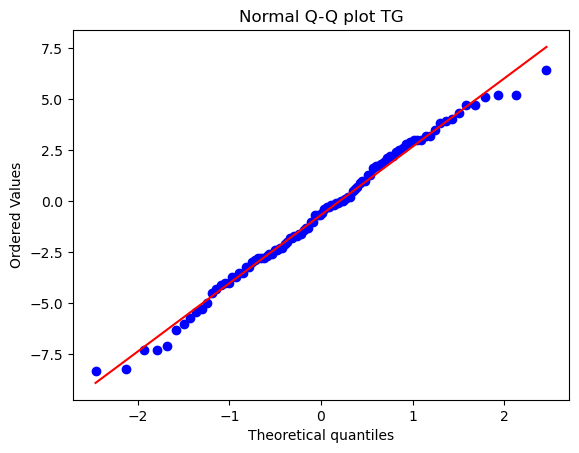

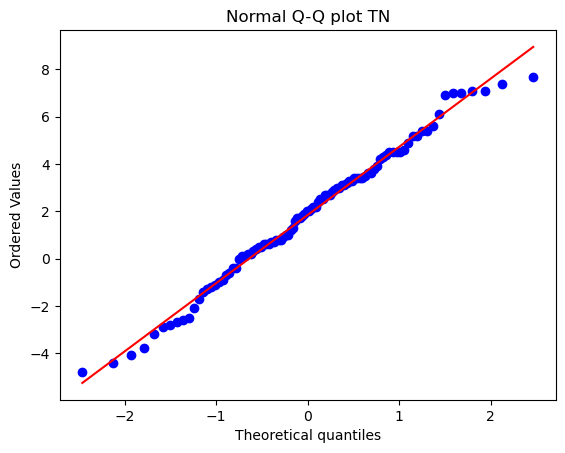

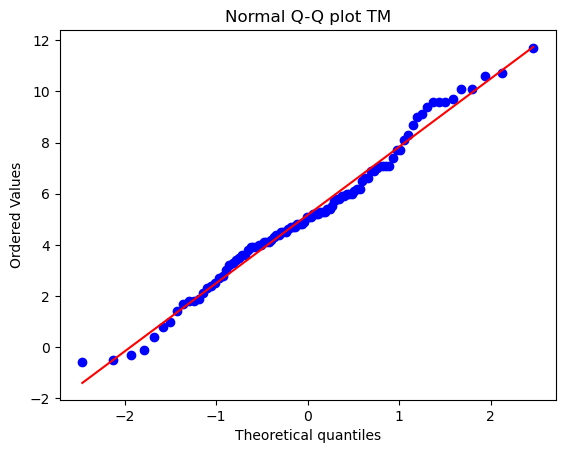

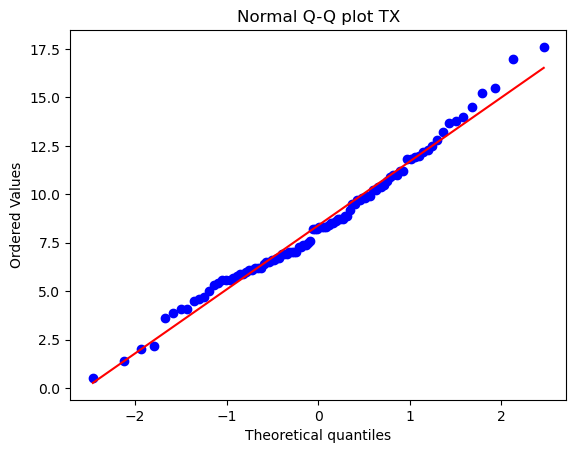

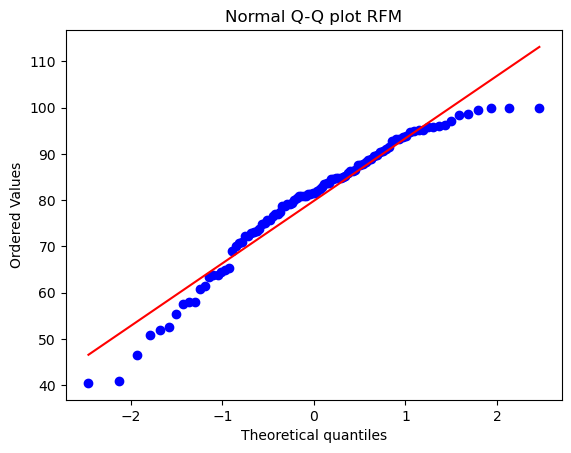

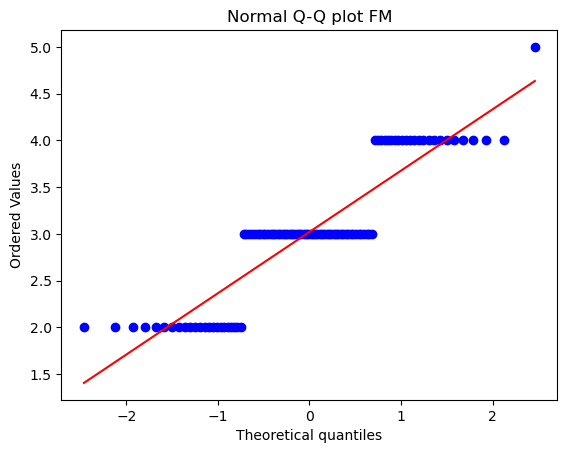

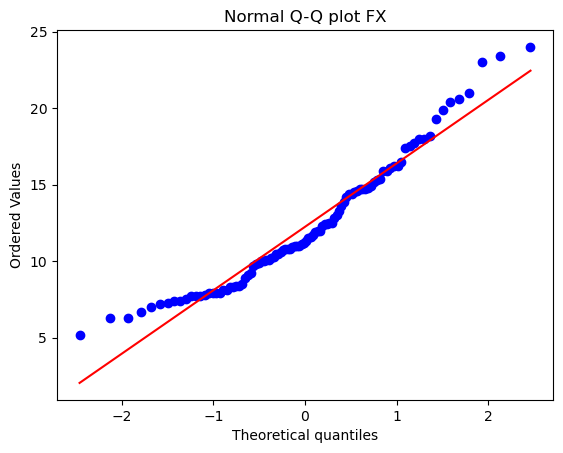

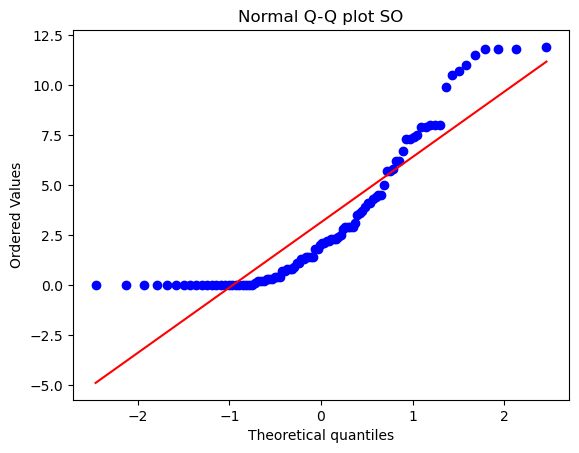

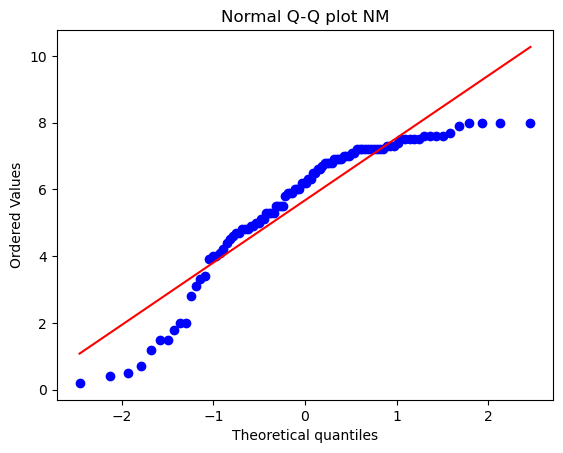

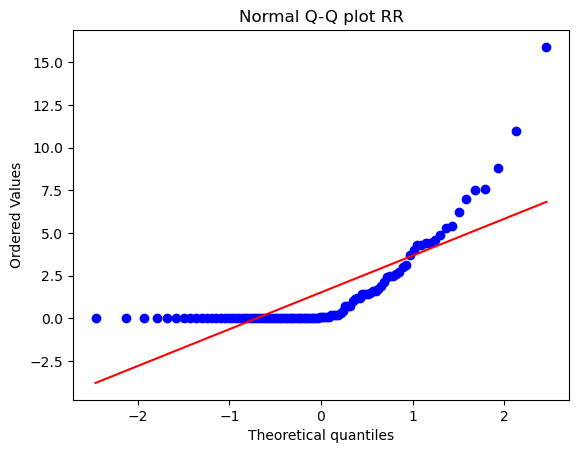

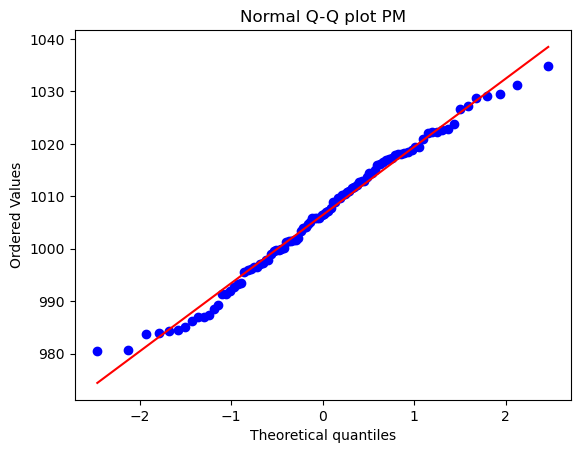

In [10]:
import scipy.stats as stats

for i in range(3,df.shape[1]): 
    plt.figure(i)
    stats.probplot(df.iloc[0:100,i], dist="norm", plot=plt)
    plt.title("Normal Q-Q plot {}".format(df.columns[i]))
    plt.show()
     


> Remark: 
>
> In praxis, we would test the hypotheses of normality with an appropriate statistical test
>


Hint: The following function tests the null hypothesis that a sample comes from a normal distribution. 

`k2, p = stats.normaltest()`

Think about: What are the outputs? What is H_0?   

In the SciPy implementation of these tests, you can interpret the p value as follows:

p <= alpha: reject H0, not normal.
p > alpha: fail to reject H0, normal.
This means that, in general, we are seeking results with a larger p-value to confirm 
that our sample was likely drawn from a Gaussian distribution.

A result above 5% does not mean that the null hypothesis is true. It means that it is 
very likely true given available evidence. The p-value is not the probability of the 
data fitting a Gaussian distribution; it can be thought of as a value that helps us 
interpret the statistical test.



**k^2**: kurtosis, **s** is the z-score returned by skewtest
**s^2 + k^2**: exzess, **k**: is the z-score returned by kurtosistest. **z-score** is the number of standard deviations away from a mean for a data point. A z-score helps point out how unusual or usual a data point is from the other values. A z-score must be used with a normal distribution curve.
See: https://dfrieds.com/math/z-scores.html


The test on normal distribution is an important test for machine learning techniques, see:
 https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
 
 
 



***



# Correlation and Regression

## 2. Measures of Relation Between Variables

In the last week we mainly focused on a single variable, describing a distribution and calculating summary statistics. Statistics that describe a single variable are referred to as univariate statistics. If we examine the relationship of two variables, we refer to bivariate statistics. If the relationships among several variables are simultaneously examined, we refer to multivariate statistics. Measures of relation provide a means of summarizing the size of the relation between two variables

### The Covariance 

The The [**covariance**](https://en.wikipedia.org/wiki/Covariance) is a measure of the joint variability of two variables. The covariance can take any value in the interval $(- \infty, \infty)$. The covariance is positive, if the greater/smaller values of one variable mainly correspond with the greater/smaller values of the other variable. The covariance is negative if the variables tend to show opposite behavior. If greater values of one variable mainly correspond to the lesser values of the other.

The covariance, $s_{xy}$, is calculated by the equation

$$s_{xy}=\frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{n-1}$$

The normalized version of the covariance, is called correlation coefficient, which magnitude indicates the strength of a linear relation between two variables.


The **normalized version of the covariance**, is called  **correlation coefficient**, which magnitude indicates the strength of a linear relation between two variables.

***

## Correlation

### Correlation coefficient


Correlation is a commonly used method to examine the relationship between **quantitative variables**. The most commonly used statistic is the **linear correlation coefficient**, $r$, which is also known as the [**Pearson product moment correlation coefficient**](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) in honor of its developer, [Karl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson). Is it given by

$$r = \frac{\sum_{i=1}^n(x_i- \bar x)(y_i - \bar y)}{\sqrt{\sum_{i=1}^n(x_i- \bar x)^2}\sqrt{\sum_{i=1}^n(y_i- \bar y)^2}}=\frac{s_{xy}}{s_x s_y}\text{,}$$

where $s_{xy}$ is the covariance of $x$ and $y$ and $s_x$ and $s_y$ the standard deviation of $x$ and $y$, respectively. By dividing by the sample standard deviations, $s_x$ and $s_y$, the linear correlation coefficient, $r$, becomes scale independent and takes values between $-1$ and $1$.


The linear correlation coefficient measures the strength of the linear relationship between two variables. If $r$ is close to $\pm 1$, the two variables are highly correlated and if plotted on a scatter plot, the data points cluster about a line. If $r$ is far from $\pm 1$, the data points are more widely scattered. If $r$ is near $0$, the data points are essentially scattered about a horizontal line indicating that there is almost no linear relationship between the variables.



![Alt-Text](./Abbildungen/Korrelationen.jpg)

An interesting property of $r$ is, that its sign reflects the slope of the linear relationship between two variables. A positive value of $r$ suggests that the variables are **positively linearly correlated**, indicating that $y$ tends to increase linearly as $x$ increases. A negative value of $r$ suggests that the variables are **negatively linearly correlated**, indicating that $y$ tends to decrease linearly as $x$ increases.

There is no unambiguous classification rule for the quantity of a linear relationship between two variables. However, the following table may serve a as rule of thumb how to address the numerical values of Pearson product moment correlation coefficient.

$$
\begin{array}{lc}
\hline
\ \text{Strong linear relationship} & r > 0.9 \\
\ \text{Medium linear relationship} & 0.7 < r \le 0.9\\
\ \text{Weak linear relationship} & 0.5 < r \le 0.7 \\
\ \text{No or doubtful linear relationship} & 0 < r \le 0.5 \\
\hline 
\end{array}
$$

Pearson's correlation assumes the variables to be roughly normally distributed and it is not robust in the presence of outliers.

In the section on LINEAR REGRESSION on May 4th we will discuss the coefficient of determination, $R^2$, a descriptive measure for the quality of linear models. There is a close relation between $R^2$ and the linear correlation coefficient, $r$. The coefficient of determination, $R^2$, equals the square of the linear correlation coefficient, $r$.


$$\text{coefficient of determination }(R^2) =r^2 $$

***

###  Pearson correlation coefficient: An example

In order to get some intuition we calculate the Pearson product moment correlation coefficient in an example. Therefore we we load the *students* data set into our workspace (You may download the `students.csv` file [here](https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv)). 

To read the data we use the data frame tool from the pandas module Pandas stands for "Python and data analysis" and "panal data". Thus, we have to import this module first.

In [11]:
import pandas as pd

df_students = pd.io.parsers.read_csv('https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv', sep=',',index_col=0)

In [12]:
df_students.head(2)

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN


The *students* data set is structures as follows: eas row represents a particular student, and ecah column corresponds to a variable/feature related to that particular student. You can print these self-explaining variables with: `list(df.columns)`.

In [13]:
list(df_students.columns) 

['stud.id',
 'name',
 'gender',
 'age',
 'height',
 'weight',
 'religion',
 'nc.score',
 'semester',
 'major',
 'minor',
 'score1',
 'score2',
 'online.tutorial',
 'graduated',
 'salary']


In this example we assess **the linear relationship between the weight and the height of students**. Therefore, we extract `weight` and `height` variables from the data set.

In [14]:
x = df_students.loc[ : , 'height']
y = df_students.loc[ : , 'weight']
print(x)

1       160
2       172
3       168
4       183
5       175
       ... 
8235    181
8236    178
8237    169
8238    195
8239    170
Name: height, Length: 8239, dtype: int64


Text(0, 0.5, 'weight')

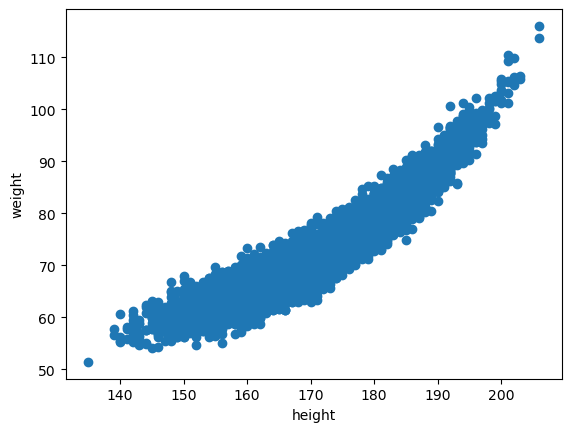

In [15]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.xlabel('height')
plt.ylabel('weight')

These are a lot of data points! Let's take a sample of `n=100` data points and look at the scatter plot again

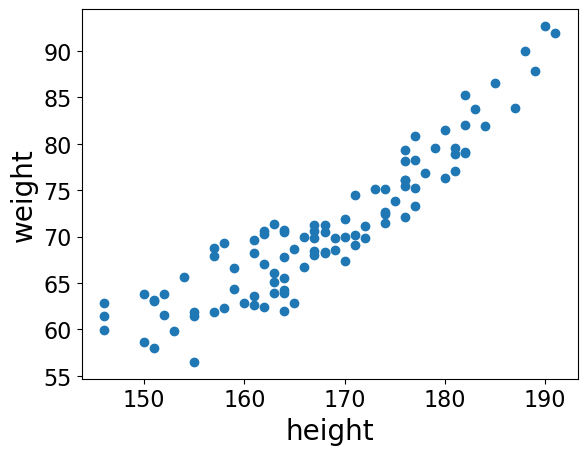

In [16]:
import matplotlib.pyplot as plt

df_sample = df_students.sample(n=100, replace=False, random_state=1)

x_sample = df_sample.loc[ : , 'height']
y_sample = df_sample.loc[ : , 'weight']

plt.rcParams['font.size'] = '16'

plt.xlabel('height',fontsize=20)
plt.ylabel('weight',fontsize=20)

plt.scatter(x_sample,y_sample)

It looks like a correlation of the heigt and the weight of the students. 

As as sanity check we calculate the ratio of the covariance of $x$ and $y$ and the standard deviation of $x$ and $y$.

The scatter plot indicates that there exists an linear relationship between the two variables under consideration. 

For the sake of this exercise we calculate the linear correlation coefficient by hand at first, and then we apply the `cor()` function in R.

Recall the equation from above

$$r = \frac{\sum_{i=1}^n(x_i- \bar x)(y_i - \bar y)}{\sqrt{\sum_{i=1}^n(x_i- \bar x)^2}\sqrt{\sum_{i=1}^n(y_i- \bar y)^2}}=\frac{s_{xy}}{s_x s_y}$$

r is called **Pearsons correlation coefficient**. To calcualte the mean and the square roots, we import the `numpy module`.

In [17]:
import numpy as np 

x_bar = np.mean(x)
y_bar = np.mean(y)

sum((x - x_bar) * (y - y_bar)) / (np.sqrt(sum((x - x_bar)**2)) * np.sqrt(sum((y - y_bar)**2)))

0.9398042009086323

As a sanity check we calculate the ration of the covariance of $x$ and $y$ and the standard deviation of $x$ and $y$: 

$$r =\frac{s_{xy}}{s_x s_y}$$

We use the numpy module to calculate the standard deviations `np.std()` and the covariance np.cov(x,y).

But! Using numpy, `np.cov(a,b)` gives us the covariance matrix

$$\begin{pmatrix}
cov(a,a) &  cov(a,b) \\
cov(b,a) & cov(b,b) \\
\end{pmatrix}$$

Therefore, use `numpy.cov(a,b)[0][1]` for the matrix element cov(a,b)

In [18]:
np.cov(x,y)[0][1]/(np.std(x)*np.std(y))

0.9399182825062196

Finally, from the `module from scipy.stat`  we `import pearsonr` to calculate Pearson's correlation coefficient that we called r above. 

In [19]:
from scipy.stats import pearsonr

corr = pearsonr(x,y)[0]
print(corr)

0.9398042009086244


Perfect. The three calculations yield the exact same result! 

We may conclude, that there is a strong linear correlation between the height and the weight of a student.

> **Exercise 2**: Take the data set of the DWD and calculate the correlation-coefficient after Pearson for different time dependent variables and provide the coefficients of determination in percent!

In [20]:
## your code here ###  

***

Of course a correlation analysis is not restricted to two variables. Thanks to statistical software packages, we are able to conduct a pairwise correlation analysis for more than two variables. Let us first prepare the data set. For a better visualization experience we draw again 100  randomly picked students from the *students* data set. Then we select a number of variables to perform correlation analysis.


In [21]:
df_sample = df_students.sample(n=100, replace=False, random_state=1)

The `corr()` function returns a nice table, also called **correlation matrix**,  with the pairwise Pearson's correlation coefficients. Obviously some variables contain missing values, denoted as `NaN`. 

In [22]:
corrMatrix = df_students.corr()

corrMatrix

,stud.id,age,height,weight,nc.score,score1,score2,online.tutorial,graduated,salary
stud.id,1.000000,-0.001796,-0.004635,-0.002801,0.005271,0.001184,0.003586,-0.002001,-0.019557,0.012719
age,-0.001796,1.000000,-0.013189,-0.011750,0.015227,-0.007980,-0.000118,-0.004492,0.000862,0.041634
height,-0.004635,-0.013189,1.000000,0.939804,0.018987,0.168574,0.157238,0.016439,0.078621,0.357056
weight,-0.002801,-0.011750,0.939804,1.000000,0.012642,0.156850,0.147049,0.010360,0.073764,0.314938
nc.score,0.005271,0.015227,0.018987,0.012642,1.000000,-0.009223,-0.001762,0.032620,0.055296,0.018956
score1,0.001184,-0.007980,0.168574,0.156850,-0.009223,1.000000,0.901568,-0.008022,0.023933,0.470997
score2,0.003586,-0.000118,0.157238,0.147049,-0.001762,0.901568,1.000000,0.064479,0.016462,0.440388
online.tutorial,-0.002001,-0.004492,0.016439,0.010360,0.032620,-0.008022,0.064479,1.000000,0.293575,-0.019561
graduated,-0.019557,0.000862,0.078621,0.073764,0.055296,0.023933,0.016462,0.293575,1.000000,NaN
salary,0.012719,0.041634,0.357056,0.314938,0.018956,0.470997,0.440388,-0.019561,NaN,1.000000


A table is nice representation for a correlation analysis, but a figure of course would improve the interpretability. Import the `seaborn` and the `matplotlib` packages for plotting the correlation matrices. The NaN data fields are empty. 

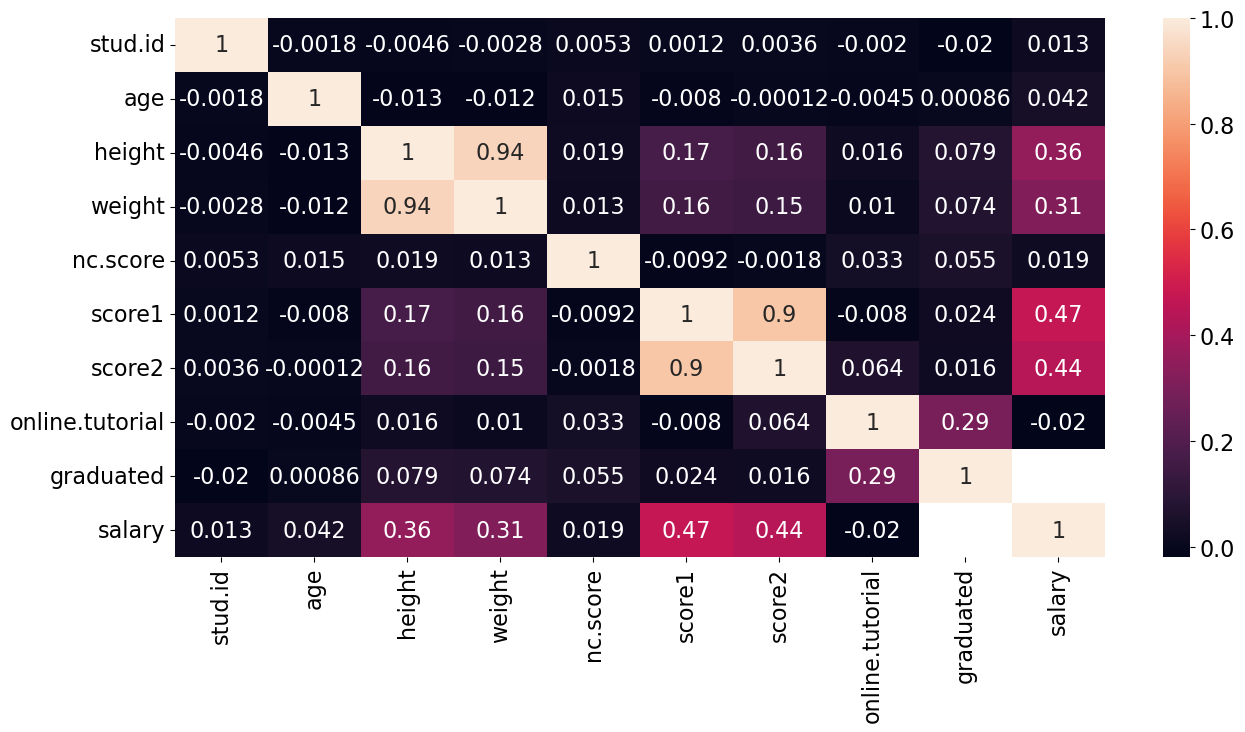

In [23]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
sn.heatmap(corrMatrix, annot=True)
plt.show()


Immediately, we realize that the majority of the variables does not appear to be linearly correlated. In contrast the variable pairs `height` and `weight`, as well as `score1` and `score2` appear to be positively correlated. 



> **Exercise 3**: Plot the correlation matrix for the meteorological data set

In [24]:
## YOUR CODE HERE ##

***


## Spearman's rank correlation coefficient

[**Spearman's rank correlation coefficient**](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient), also known as the Spearman's $\rho$ is a non-parametric rank correlation coefficient. It was developed by [Charles Spearman](https://en.wikipedia.org/wiki/Charles_Spearman) and is an alternative to Pearson's product moment correlation coefficient. The Spearman $\rho$ rank correlation coefficient is denoted by $r_s$ for sample data and by $\rho_s$ for population data (Mann 2012). The correlation coefficient assesses the monotonic relationship between two variables and ranges between $-1$ and $1$. It describes the linear correlation between the ranks of the data on variables $x$ and $y$. Spearman's correlation is high when the variables have a similar rank, and low when variables have a dissimilar rank.

To calculate $r_s$, the data for each variable, $x$ and $y$, is ranked separately. The difference between each pair of ranks and denote it by $d$. For a given bivariate sequence $(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)$ Spearman's $r_s$  is given by

$$r_s=1-\frac{6\sum_{i=1}^n (r_{xi}-r_{yi})^2}{n(n^2-1)}\text{,}$$
where $r_{xi}=Rank(x_i)$ , $r_{yi}= Rank(y_i)$ , and $n$ is the sample size.

In contrast to Pearson's linear correlation coefficient Spearman's linear coefficient is appropriate for both quantitative and ordinal variables. In addition rank based correlations are not dependent on the normal distributional assumption are more resistant to outliers (Schumann 2010).

***

#### Spearman's rank correlation coefficient: An example



Remark: we ca calculate **Spearman's rank correlation coefficient** by hand. Recall the equation

$$r_s=1-\frac{6\sum_{i=1}^n (r_{xi}-r_{yi})^2}{n(n^2-1)}\text{,}$$

where $r_{xi}=Rank(x_i)$ , $r_{yi}= Rank(y_i)$ , and $n$ is the sample size. 


Analogously to the Pearson correlation, we can calculate the correlation matrix with respect to the Spearman correlation:

In [25]:
corrMatrix_spearman = df_students.corr(method = 'spearman')
corrMatrix_spearman

,stud.id,age,height,weight,nc.score,score1,score2,online.tutorial,graduated,salary
stud.id,1.000000,-0.007478,-0.003287,-0.002397,0.003027,0.003605,0.000470,-0.001795,-0.019222,0.005871
age,-0.007478,1.000000,-0.002670,-0.001587,0.004407,-0.004001,-0.000492,0.000391,-0.002713,0.025542
height,-0.003287,-0.002670,1.000000,0.950071,0.022301,0.165418,0.157015,0.017582,0.081455,0.376747
weight,-0.002397,-0.001587,0.950071,1.000000,0.016205,0.164095,0.156686,0.012669,0.075440,0.359435
nc.score,0.003027,0.004407,0.022301,0.016205,1.000000,-0.000380,0.003966,0.030965,0.057439,0.027155
score1,0.003605,-0.004001,0.165418,0.164095,-0.000380,1.000000,0.891007,-0.003083,0.023823,0.466363
score2,0.000470,-0.000492,0.157015,0.156686,0.003966,0.891007,1.000000,0.068849,0.014204,0.439827
online.tutorial,-0.001795,0.000391,0.017582,0.012669,0.030965,-0.003083,0.068849,1.000000,0.293575,-0.019925
graduated,-0.019222,-0.002713,0.081455,0.075440,0.057439,0.023823,0.014204,0.293575,1.000000,NaN
salary,0.005871,0.025542,0.376747,0.359435,0.027155,0.466363,0.439827,-0.019925,NaN,1.000000


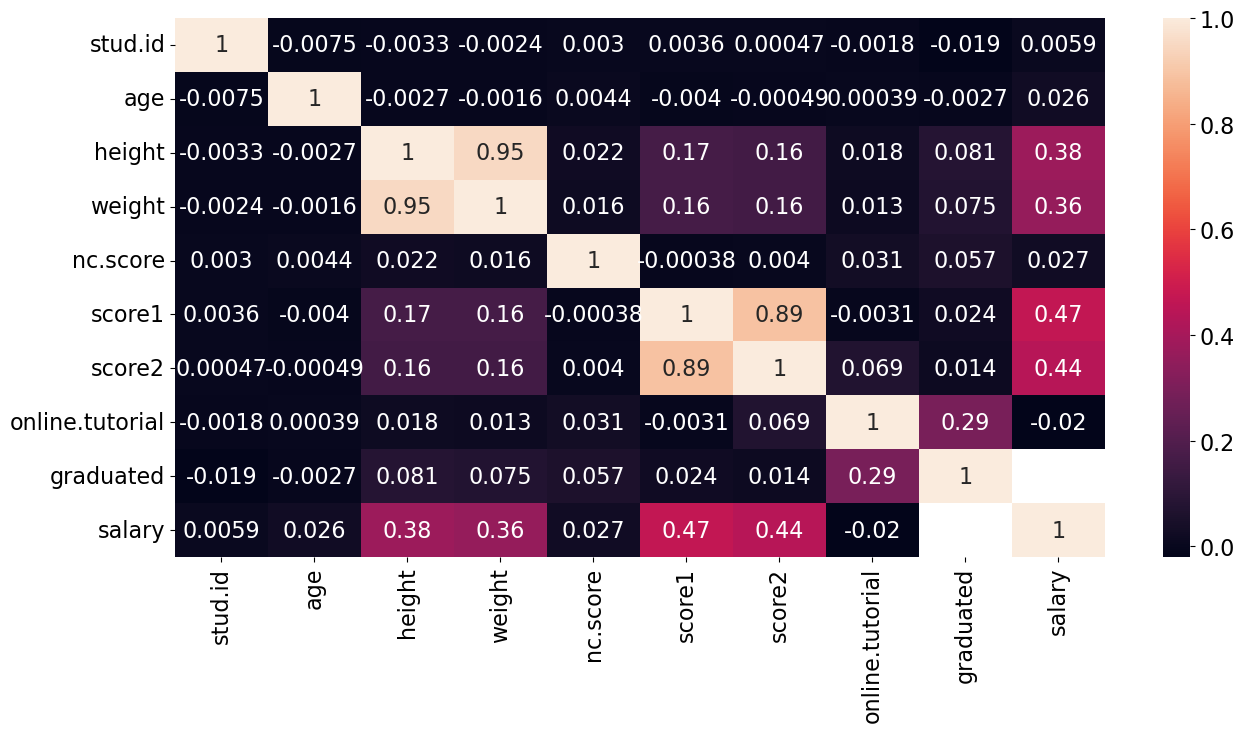

In [26]:
plt.figure(figsize=(15,7))
sn.heatmap(corrMatrix_spearman, annot=True)
plt.show()


***


> **Exercise (Recall) 4**: 
>1. How are the Pearson correlation coefficient and the Spearman rank correlation coefficient defined? 
>2. Both corrrelations have values between -1 and 1. In which case is the coefficient negative? 
>3. Sketch an example (by hand), where the Pearson Correlation Coefficient is larger than the Spearman rank correlation!



> **Exercise 5**: 
> Calculate the correlation coefficient matrix of the mateorological data set using the Spearman-rank-coefficient.

In [27]:
# your code here #


> **Exercise 6 (optional)**: 
> Find out hot to plot scatter diagrams for the meteorological variables 
> See for example: https://www.marsja.se/pandas-scatter-matrix-pair-plot/

In [28]:
# code #

Now, it is recommended to advance with  a statistical test, in order  to assess if the result is statistical significant, or if the variation is just due to chance. Thus, let us talk about **HYPOTHESIS TESTING**: 

***




### The Correlation-Test: An Example

In order to practice the correlation test we use again the **students** data set. 

 **Question: is there a linear relationship between the grades of two consecutive statistic exams?**
 
 

In [29]:
df_students

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,818044,"Her, Joshua",Male,22,181,79.1,Protestant,2.91,6th,Environmental Sciences,Social Sciences,73.0,71.0,0,1,36750.087135
8236,560166,"Reid, Jose",Male,23,178,72.6,Catholic,2.03,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
8237,380174,"Villa, Raechelle",Female,20,169,67.7,Other,3.72,3rd,Environmental Sciences,Economics and Finance,77.0,75.0,1,0,NaN
8238,540967,"Ngo, Preston",Male,23,195,98.6,Other,2.74,4th,Social Sciences,Political Science,50.0,46.0,1,1,40112.041834



***

### Data preparation

We start with data preparation.

* We subset the data set based on the `score1` and `score2` variables, thus we omit any `NaN` value by picking only the  complete cases within the data set.
* Then we sample `n` students and extract the variables of interest
* For the purpose of visual inspection we plot the random sample in form of a scatter plot



Text(0, 0.5, 'score 2')

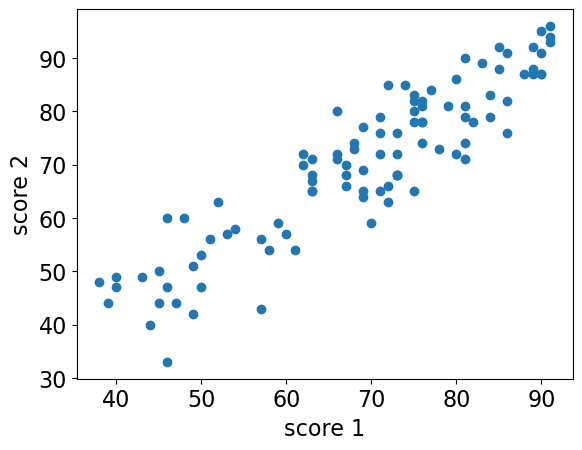

In [30]:
df_sudents_noNaN = df_students.dropna(subset=['score1', 'score2'])

df_sample = df_sudents_noNaN.sample(n=100, replace=False, random_state=1)

s1_sample = df_sample.loc[ : , 'score1']
s2_sample = df_sample.loc[ : , 'score2']

plt.scatter(s1_sample,s2_sample)
plt.xlabel('score 1')
plt.ylabel('score 2')

The visual inspection indicates an existing positive linear relationship between the variables `score1` and `score2`.

***

### For the sake of completeness: Hypothesis testing - the steps

In order to conduct the **correlation -test** we follow the step-wise implementation procedure for hypothesis testing. The **correlation -test** follows the same step-wise procedure as discussed in the previous sections.
$$
\begin{array}{l}
\hline
\ \text{Step 1}  & \text{State the null hypothesis } H_0 \text{ and alternative hypothesis } H_A \text{.}\\
\ \text{Step 2}  & \text{Decide on the significance level, } \alpha\text{.} \\
\ \text{Step 3}  & \text{Compute the empirical value of the test statistic.} \\
\ \text{Step 4} &\text{Determine the p-value.} \\
\ \text{Step 5} & \text{If } p \le \alpha \text{, reject }H_0 \text{; otherwise, do not reject } H_0 \text{.} \\
\ \text{Step 6} &\text{Interpret the result of the hypothesis test.} \\
\hline 
\end{array}
$$

**Step 1: State the null hypothesis $H_0$ and alternative hypothesis $H_A$**

The null hypothesis states that there is no linear relationship between the exam grades of one exam compared to the other.

$$H_0: r  = 0$$

Recall, that the formulation of the alternative hypothesis dictates if we apply a two-sided, a left tailed or a right tailed hypothesis test. 

**Alternative hypothesis**
$$H_A: r \ne 0 $$

This formulation results in a two-sided hypothesis test. 

***

**Step 2: Decide on the significance level, $\alpha$**


$$\alpha = 0.01$$

In [31]:
alpha = 0.01


***

**Step 3 and 4: Compute the value of the test statistic and the *p*-value.**



In [32]:
df = len(s1_sample)-1

# two-sided test: 
r,pval = pearsonr(s1_sample,s2_sample)

print('The cor. coeff is', r, ' and the p value is', pval)

The cor. coeff is 0.9121051934069795  and the p value is 9.830508035145437e-40


***

**Step 5: If $p \le \alpha$, reject $H_0$; otherwise, do not reject $H_0$.**

In [33]:
if pval < alpha:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

we reject null hypothesis


The p-value is less than the specified significance level of 0.01; we reject H0
. The test results are statistically significant at the 1% level and provide very strong evidence against the null hypothesis.

In [34]:
# CODE # 

***

**Step 6: Interpret the result of the hypothesis test.**

At the 1% significance level, the data provides very strong evidence to conclude that the exam grades of students are linearly correlated.

***

> **Exercise 7 Optional (Recall)**:
> * What is the Null Hyoptheses for t-tests?
> * What is the Null Hyoptheses for ANOVA?
>
>For further deteils on t-tests with python see for example https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

> **Exercise 8 Optional**: Think about a hypothesis that you could prove in the meteorological data set and 
>
>0. Choose a test
>1. formulate the Null hypotheses
>2. set alpha
>3.+4. Compute the value of the test statistic and the p-value.
>5. decide about the nullhypotheses



***



In [35]:
# YOUR CODE HERE # 


****

# 3  Linear Regression

***

[Regression](https://en.wikipedia.org/wiki/Regression_analysis) analysis is a statistical process for estimating the relationships between two or more variables. The relationship is modeled as $y \sim x$ or $y = f(x)$. Both model descriptions indicate  that the variable $y$ is a function  of $x$. Therefore the variable $y$ is denoted as **response variable** or **dependent variable**, whereas the variable $x$ is denoted as **predictor variable** or **independent variable**. 

***

## Simple Linear Regression

In this section we discuss a special type of regression, which is called [**simple linear regression**](https://en.wikipedia.org/wiki/Simple_linear_regression). In this special case of  regression analysis the relationship between the response variable $y$ and and the predictor variable $x$ is given in form of a **linear** equation

$$y= a + bx\text{,}$$
where $a$ and $b$ are constants. The number $a$ is called **intercept** and defines the point of intersection of the line  and the $y$-axis ($x=0$). The number $b$ is called **regression coefficient**. It is a measure of the slope of the **regression line**. Thus, $b$ indicates how much the $y$-value changes when the $x$-value increases by 1 unit. The adjective **simple** refers to the fact that the outcome variable is related to a single predictor. The model is considered as a **deterministic model**, as it gives an exact relationship between $x$ and $y$.

Let us consider a simple example. Given a population of $n = 3$ points with Cartesian coordinates $(x_i,y_i)$ of $(1,6)$, $(2,8)$ and $(3,10)$. These points plot on a straight line and thus, can be described by a linear equation model in the form of $y= a + bx$, where the intercept $a=4$ and $b=2$. 



![Alt-Text](./Abbildungen/Regression.png)

***

In many cases, the relationship between two variables $x$ and $y$ is not exact. This is due to the fact, that the response variable $y$ is affect by other unknown and/or random processes, that are not fully captured by the predictor variable $x$. In such a case the data points do not line up on a straight line. However, the data still may follow an underlying linear relationship. In order to take these unknowns into consideration a **random error term**, denoted by $\epsilon$, is added to the linear model equation, thus resulting in a **probabilistic model** in contrast to the deterministic model from above.

$$y = a + b x + \epsilon$$

where the error term $\epsilon_i$ is assumed to consist of independent normal distributed values, $e_i \sim N(0, \sigma^2)$.


In linear regression modelling following assumptions are made about the model (Mann 2012).

* The random error term $\epsilon$ has a mean equal to zero for each $x$.  
* The errors associated with different observations are independent. 
* For any given $x$, the distribution of errors is normal. 
* The distribution errors for each $x$ has the same (constant) standard deviation, which is denoted by $\sigma_{\epsilon}$.

***

Let us consider another example. This time we take a random sample of sample size $n = 8$ from a population. In  order to emphasis that the values of the intercept and slope are calculated from sample data, $a$ and $b$ are denoted by $\beta_0$ and $\beta_1$, respectively. In addition, the error term $\epsilon$ is denoted as $e$. Thus, $\beta_0$, $\beta_1$ and $e$ are estimates based on sample data for the population parameters $a$, $b$ and $\epsilon$. 

$$\hat y = \beta_0 + \beta_1 x + e \text{,}$$

where $\hat y$ is the the **estimated or predicted value of $y$** for any given value of $x$.

![Alt-Text](./Abbildungen/Regression-2.png)

The error $e_i$ for each particular pair of values ($x_i,y_i$), also called **residual**, is computed by the difference of the observed value $y_i$ and the predicted value given by $\hat y_i$.

$$e_i = y_i - \hat y_i$$

Depending on the data $e_i$ is a negative number if $y_i$ plots below the regression line or it is a positive number if $y_i$ plots above the regression line.

***

### Paramter Estimation: Ordinary Least Squares Method

Now, as we relaxed the constraints of the deterministic model and introduced an error term $\epsilon$, we run into another problem. There are infinitely many regression lines that fulfill the specifications of the probabilistic model. 

![Alt-Text](./Abbildungen/Regression-3.png)

Obviously, we need a strategy to select that particular regression line, which corresponds to the *best* model in order to describe the data. In this section we discuss on one of the most popular methods to achieve that task, the so called [**ordinary least squares method (OLS)**](https://en.wikipedia.org/wiki/Ordinary_least_squares).

As mentioned in the previous section for each particular pair of values $(x_1,y_1)$ the error $e_i$ is calculated by $y_1-\hat y$. In order to get the best fitting line for the given data the **error sum of squares**, denoted by SSE, is minimized.

$$SSE = \sum_{i=1}^n e_i^2=\sum_{i=1}^n (y - \hat y)^2$$

For the simple linear model there exists an analytic solution for $\beta_1$.

$$\hat{\beta_1} = \frac{\sum_{i=1}^n ((x_i- \bar x) (y_i-\bar y))}{\sum_{i=1}^n (x_i-\bar x)^2} = \frac{cov(x,y)}{var(x)}\text{,}$$
and $\beta_0$.

$$\hat{\beta_0} = \bar y -\hat{\beta_1} \bar x$$

The OLS gives the maximum likelihood estimate for $\hat{\beta}$ when the parameters have equal variance and are uncorrelated, and the residuals $\epsilon$ are uncorrelated and follow a Gaussian distribution ([homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity)).

***

###  Simple Linear Regression: An example

In order to get some hands-on experience we apply the **simple linear regression** in an exercise. Therefore we load the *students* data set. You may download the `students.csv` file [here](https://www.google.com). Import the data set and assign a proper name to it.


In [36]:
import pandas as pd

df_students = pd.io.parsers.read_csv('https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv', sep=',',index_col=0)

The *students* data set consists of `8239` rows, each of them representing a particular student, and `r df.cols` columns, each of them corresponding to a variable/feature related to that particular student. These self-explaining variables are: `stud.id, name, gender, age, height, weight, religion, nc.score, semester, major, minor, score1, score2, online.tutorial, graduated, salary`.

In order to showcase the **simple linear regression** we examine the relationship between two variables, the height of students, as the predictor variable and the weight of students as response variable.

***

#### Data preparation

For data preparation we randomly sample `50` students from the data set and build a data frame with the two variables of interest (`height` and `weight`). Further we use the module ` matplotlib.pyplot` to plot the data in form of a scatter plot to visualize the underlying linear relationship between the two variables.

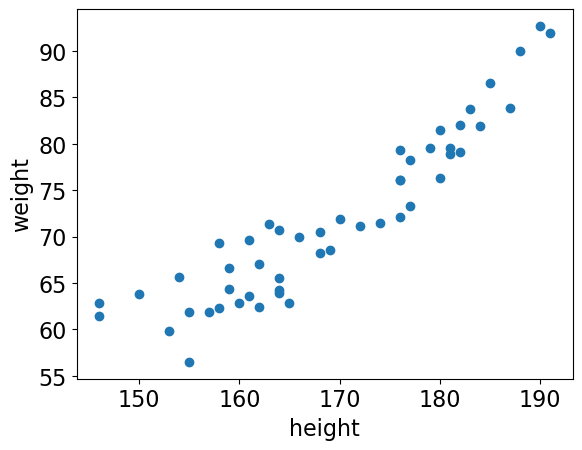

In [37]:
df_sample = df_students.sample(n=50, replace=False, random_state=1)

x_sample = df_sample.loc[ : , 'height']
y_sample = df_sample.loc[ : , 'weight']


import matplotlib.pyplot as plt

plt.xlabel('height')
plt.ylabel('weight')
plt.scatter(x_sample,y_sample)

The visual inspection confirms our assumption that the relationship between the height and the weight variable is roughly linear. In other words, with increasing height the individual student tends the have a higher weight. 

*** 

#### Parameter estimation

 **Solving for $\beta_0$ and  $\beta_1$ analytically in Python**

As shown in the previous section the parameter $\beta_0$ and $\beta_1$ of a simple linear model may be calculated analytically. Recall the equation for a linear model from sample data

$$\hat y = \beta_0 + \beta_1 x + e \text{,}$$

for $\beta_1$

$$\hat{\beta_1} = \frac{\sum_{i=1}^n ((x_i- \bar x) (y_i-\bar y))}{\sum_{i=1}^n (x_i-\bar x)^2} = \frac{cov(x,y)}{var(x)}\text{,}$$

and $\beta_0$.

$$\hat{\beta_0} = \bar y -\hat{\beta_1} \bar x$$

For a better understanding we use Python to calculate the individual terms using numpy

In [38]:
import numpy as np

# Calculate b1

x = df_students.loc[ : , 'height']
y = df_students.loc[ : , 'weight']

x_bar = np.mean(x)
y_bar = np.mean(y)

b1 = np.sum((x-x_bar)*(y-y_bar)) / np.sum((x-x_bar)**2)
print('b1 =',b1)

b1 = 0.7325966947636607


The slope of the regression model is approximately `b1`. For a sanity check we calculate the ratio of the covariance of $x$ and $y$, applying the `cov()` function, and the variance of $x$, using the `var()` function and compare it to the result from above. 

In [39]:
np.cov(x,y)[0][1]/np.var(x)

0.7326856237142365

A perfect match!

Further, we calculate $\beta_0$.

In [40]:
# Calculate b0
b0 = y_bar - b1*x_bar
b0

-52.554840221684714

The intercept $\beta_0$ of the regression model is approximately `-52`.

Thus we can write down the regression model

$$\text{weight} = -52 + 0.73 \times \text{height} $$

Now, based on that equation we may determine the weight of a student given its height. Just for fun let us predict the weight of students with a height of `156, 178, 192` cm. 

In [41]:
weight_156 = b0+b1*156
weight_178 = b0+b1*178
weight_192 = b0+b1*192

print(' Eine Person der Größt 156 cm wiegt',weight_156, 'kg')
print(' Eine Person der Größt 178 cm wiegt',weight_178, 'kg')
print(' Eine Person der Größt 192 cm wiegt',weight_192, 'kg')

 Eine Person der Größt 156 cm wiegt 61.730244161446365 kg
 Eine Person der Größt 178 cm wiegt 77.84737144624691 kg
 Eine Person der Größt 192 cm wiegt 88.10372517293814 kg



*** 

### Using Python' `sklearn.linear_model` to calculate $\beta_0$ and $\beta_1$

See also the more detailed explanations in https://realpython.com/linear-regression-in-python/

First, import the class sklearn.linear_model.LinearRegression to perform linear and polynomial regression and make predictions accordingly

The second step is defining data to work with. The inputs (regressors, 𝑥) and output (predictor, 𝑦) should be arrays (the instances of the class numpy.ndarray) or similar objects. This is the simplest way of providing data for regression:


In [42]:
from sklearn.linear_model import LinearRegression

x = df_students['height'].values
y = df_students['weight'].values

print(type(x))

# we have to reshape the regressors x
x = x.reshape((-1, 1))

model = LinearRegression()
model.fit(x, y)

<class 'numpy.ndarray'>


LinearRegression()

Let us look at the just calculated interception and slope of the linear equation:

In [43]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -52.55484022168437
slope: [0.73259669]


Yes! We get the same results as above, where we calculated the intercept and the slope manually!


## Model diagnostic

[**Regression validation**](https://en.wikipedia.org/wiki/Regression_validation) or [**regression diagnostic**](https://en.wikipedia.org/wiki/Regression_diagnostic) is a set of procedures that are applied to assess the numerical results of a regression analysis. The procedures include methods of graphical and quantitative analysis or a formal statistical hypothesis test. In this section we focus on the two foremost methods, the graphical and the quantitative analysis. Statistical hypothesis tests for regression problems are provided in the section on hypothesis testing. 

***

### Coefficient of Determination

The [**Coefficient of Determination**](https://en.wikipedia.org/wiki/Coefficient_of_determination), also denoted as $R^2$, is the proportion of variation in the observed values explained by the regression equation. In other words, $R^2$ is a statistical measure of how well the regression line approximates the real data points, thus it is a measure of the goodness of fit of the model. 

The total variation of the response variable $y$ is based on the deviation of each observed value $y_i$ from the mean value $\bar y$. This quantity is called **total sum of squares, SST** and is given by

$$SST = \sum (y_i - \bar y)^2\text{.}$$
This total sum of squares (SST) can be be decomposed into two parts: the deviation explained by the regression line, $\hat y_i-\bar y$, and the remaining unexplained deviation $y_i-\hat y_i$. Consequently, the the amount of variation that is explained by the regression is called the **sum of squares due to regression, SSR** and is given by 

$$SSR = \sum (\hat y_i- \bar y)^2$$

The ratio of the sum of squares due to regression (SSR) and the total sum of squares (SST) is called the **coefficient of determination** and is denoted $R^2$.

$$R^2 = \frac{SSR}{SST}$$

$R^2$ lies between 0 and 1. A value of near 0 suggests that the regression equation is not capable of explaining the data. An $R^2$ of 1 indicates that the regression line perfectly fits the data.

Just for the sake of completeness the variation in the observed values of the response variable not explained by the regression is called **sum of squared errors of prediction, SSE** and is given by 

$$SSE = \sum (y_i-\hat y_i)^2\text{.} $$
Recall that the SSE quantity is minimized to obtain the best regression line to describe the data, also known as the [**ordinary least squares method (OLS)**](https://en.wikipedia.org/wiki/Ordinary_least_squares).

***


We can calculate coefficient of determination ($R^2$, see the first lecture) with `.score()`:

In [44]:
r_sq = model.score(x, y)

print('coefficient of determination:', r_sq)

coefficient of determination: 0.8832319360454991


This looks quiet good!

***


###  Making Predictions
 
Now, we have the linear model to predict the weight of random picked persons. We test if we get the same results as about and calculate the weights of persons of the height 156 cm, 178 cm and 192 cm. 

In [45]:
sample_heights = np.array([156,178,192])

y_pred = model.intercept_ + model.coef_ * sample_heights
print(y_pred)

[61.73024416 77.84737145 88.10372517]



We can also use the predict method!

We apply `.predict()` to pass the regressor as the argument and get the corresponding predicted response. We first have to reshape the sample_heights:

In [46]:
sample_heights = sample_heights.reshape((-1, 1))

y_pred = model.predict(sample_heights)

print(y_pred)

[61.73024416 77.84737145 88.10372517]


***

Take a look at the scatter plot again and let us plot the regression line into the scatter plot. We define a function that will plot the scatter plot of the weight/height data of the students data set. In Machine-learning language, this data can be called **trainings data**

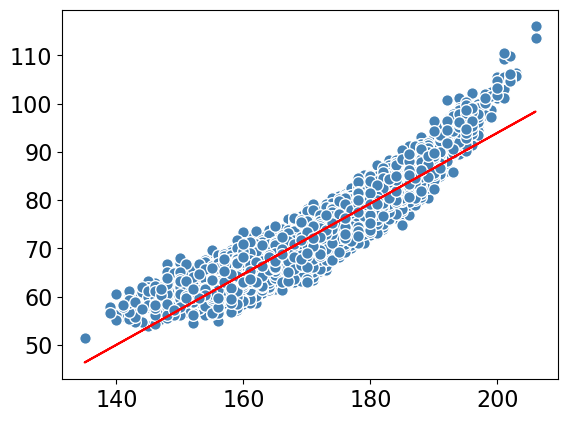

In [47]:
plt.scatter(x,y,c='steelblue', edgecolor = 'white',s=70)

# linear regression line: 
y_pred = model.predict(x)
plt.plot(x,y_pred, color = 'red')

lin_regplot(x,y,lin_model)

plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()

### Residual analysis

A residuals of an observed value is the difference between the observed value and the estimated value $(y_i−\hat{y}_i)$. It is the leftover after fitting a model to data. The **sum of squared errors of prediction (SSE)**, also known as the sum of squared residuals or the error sum of squares is an indicator how well a model represents data.

If the absolute residuals, defined for observation $x_i as $y_i−\hat{y}_i$  are unusually large, it may be that the observation is from a different population, or that there was some error in making or recording the observation.

In addition we may analyse the residuals to check if linear regression assumptions are met. Regression residuals should be approximately normally-distributed; that is, the regression should explain the structure and whatever is left over should just be noise, caused by measurement errors or many small uncorrelated factors. The normality of residuals can be checked graphically by a plot of the residuals against the values of the predictor variable. In such a residual plot, the residuals should be randomly scattered about 0
 and the variation around 0
 should be equal.

Prior to plotting the residuals it is common to standardize the residuals. The R software package provides the rstandard() function to standardize the residuals and the rstudent() to studentize the residuals.

If the assumptions for regression inferences are met, the following two conditions should hold (Weiss 2010):

A plot of the residuals (residual plot) against the values of the predictor variable should fall roughly in a horizontal band centered and symmetric about the x-axis.

A normal probability plot of the residuals should be roughly linear.

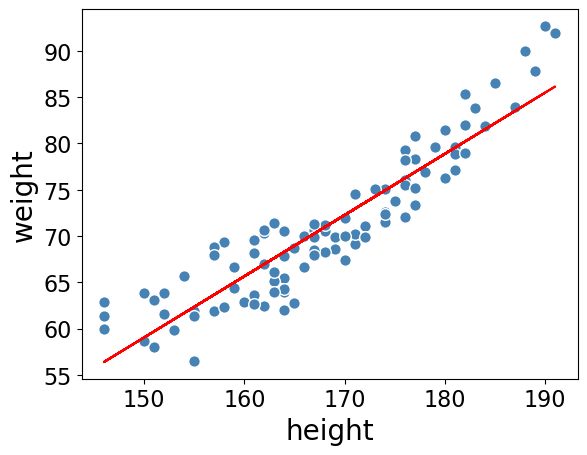

In [48]:
## Let us take a sample as last week: 

df_sample = df_students.sample(n=100, replace=False, random_state=1)

height_sample = df_sample['height'].values
weight_sample = df_sample['weight'].values

height_sample = height_sample.reshape((-1,1))

plt.rcParams['font.size'] = '16'

plt.xlabel('height',fontsize=20)
plt.ylabel('weight',fontsize=20)

model = LinearRegression()
model.fit(height_sample, weight_sample)

weight_pred = model.predict(height_sample)

plt.scatter(height_sample, weight_sample,c='steelblue', edgecolor = 'white',s=70)

#linear regression line: 
plt.plot(height_sample,weight_pred, color = 'red')

Text(0, 0.5, 'Residual in cm')

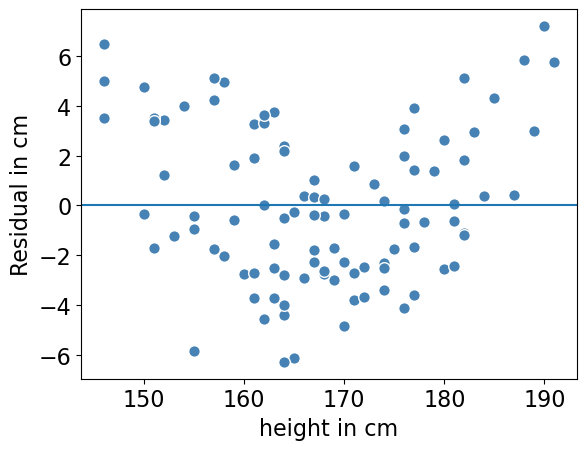

In [49]:
true_val = weight_sample # y
residual = weight_sample - weight_pred  #  y - y_predict

plt.scatter(height_sample,residual, c='steelblue', edgecolor = 'white',s=70)
plt.axhline(y=0)
plt.xlabel('height in cm')
plt.ylabel('Residual in cm')

The residuals are fairly well distributed around zero indicating that the linear model assumptions for that model are fulfilled. For an overview on different methods how to check the quality of the regression model in python, see for example here: https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685

 ## Using the statsmodels module
 
 
In python `sklearn.linear_model` is developed for making **predictions**! But if we aim for evaluating data sets, the `statsmodels` module is recommended. The `summary` function is fundamental method for regression diagnostic, applying `summary` important model propertiescan be inspected!


In [50]:
import statsmodels.api as sm

In [51]:
# Fit and summarize OLS model
mod = sm.OLS(x,y)
res = mod.fit()
    
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.196e+06
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                        0.00
Time:                        18:18:59   Log-Likelihood:                         -31063.
No. Observations:                8239   AIC:                                  6.213e+04
Df Residuals:                    8238   BIC:                                  6.214e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Description of the  `summary()` function:

**Dep. Variable**	Which variable is the response in the model <br>
**Model**	What model you are using in the fit <br>
**Method**	How the parameters of the model were calculated<br>
**No. Observations**	The number of observations (examples)<br>
**DF Residuals**	Degrees of freedom of the residuals. Number of observations - number of parameters <br>
**DF Model**	Number of parameters in the model (not including the constant term if present)

The right part of the first table shows the goodness of fit <br>


**R-squared**	The coefficient of determination. A statistical measure of how well the regression line approximates the real data points<br>
**Adj. R-squared**	The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals<br>
**F-statistic**	A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals<br>
**Prob (F-statistic)**	The probability that you would get the above statistic, given the **null hypothesis** that they are unrelated<br>
**Log-likelihood**	The log of the likelihood function.<br>
**AIC**	The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.<br>
**BIC**	The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.<br>

The second table reports for each of the coefficients:

**coef**	The estimated value of the coefficient<br>
**std err**	The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.<br>
**t** The t-statistic value. This is a measure of how statistically significant the coefficient is.<br>
**P > |t|** P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.<br>
**[95.0% Conf. Interval]**
The lower and upper values of the 95% confidence interval

 

Finally, there are several statistical tests to assess the distribution of the residuals:

**Skewness**	A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).<br>
**Kurtosis**	A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).<br>
**Omnibus	D'Angostino's test**. It provides a combined statistical test for the presence of skewness and kurtosis.<br>
**Prob(Omnibus)**	The above statistic turned into a probability<br>
**Jarque-Bera**	A different test of the skewness and kurtosis<br>
**Prob (JB)**	The above statistic turned into a probability<br>
**Durbin-Watson**	A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis<br>
**Cond. No**	A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other<br>




Seeh ttps://blog.datarobot.com/ordinary-least-squares-in-python and https://www.statsmodels.org/stable/regression.html for a detailed explanation! 


Quantities of interest can be extracted directly from the fitted model. Type `dir(results)` for a full list. Here are some examples

In [52]:
print('Parameters: ', res.params)
print('R2: ', res.rsquared)

Parameters:  [2.33198208]
R2:  0.9962622772925595



***

## From the Machine Learning perspective:

Today, we have created a first Machine Learning model! 

![Alt-Text](./Abbildungen/01_01.png)


![Alt-Text](./Abbildungen/01_02.png)

The machin-learning figures are from the first chapter in Raschka & Mirjalili (2017). 


If you would like to find a model to make future preditions, you first split the data into a

- **training set** to train a model, for example: take 80% of your data to find the linear regression line
- and a **test set** to test the trained model. E.g: to test, if the lienar regression line also fits to your test set

The training set has to be large enough to yield statistically meaningful results!
Is representative of the data set as a whole. In other words, don't pick a test set with different characteristics than the training set.
Assuming that your test set meets the preceding two conditions, your goal is to create a model that generalizes well to new data. Our test set serves as a proxy for new data. See: https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data

In [55]:
### Train und test data set
from sklearn.model_selection import train_test_split

# Let us take a sample again, this time with a sample size of n=100 
# that we split into a trainings data with 70% of the data and 
# and a test data with the 30% of the data

df_sample = df_students.sample(n=100, replace=False, random_state=1)

x = df_sample['height'].values
y = df_sample['weight'].values

X = x.reshape((-1,1))

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =  0)



In [69]:
model = LinearRegression()
model.fit(height_sample, weight_sample)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)


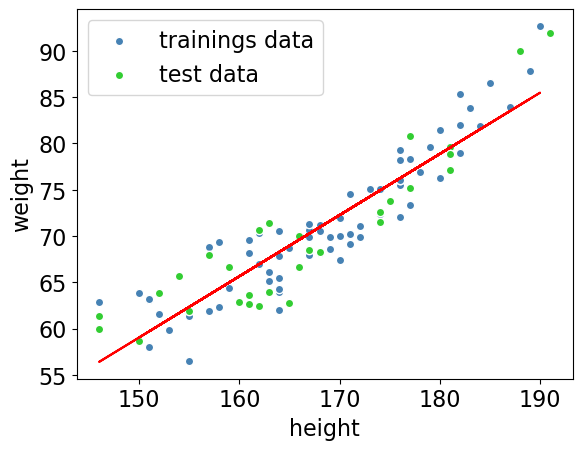

In [70]:

plt.scatter(X_train,y_train, c='steelblue', edgecolor = 'white',label = 'trainings data')
plt.scatter(X_test,y_test, c='limegreen', edgecolor = 'white', label = 'test data')
plt.legend(loc = 'upper left')
plt.xlabel('height')
plt.ylabel('weight')

# linear regression line: 
plt.plot(X_train,y_train_predict, color = 'red')



(30,) (30, 1)


Text(0, 0.5, 'Residuals')

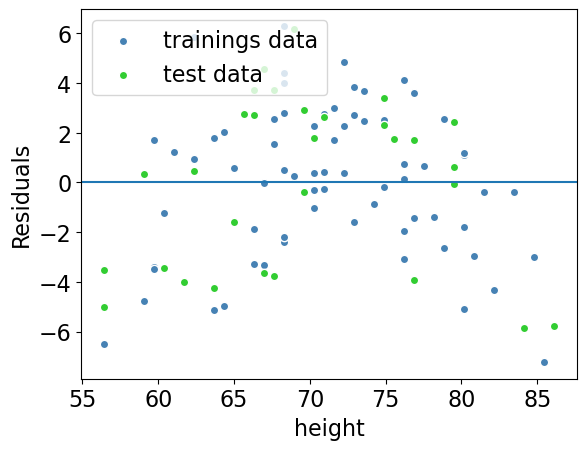

In [71]:
## Residual plot: 
print(X_test_predict.shape, X_test.shape)

plt.scatter(y_train_predict,y_train_predict - y_train, c='steelblue', edgecolor = 'white',label = 'trainings data')
plt.scatter(y_test_predict,y_test_predict - y_test, c='limegreen', edgecolor = 'white', label = 'test data')
plt.axhline(y=0)
plt.legend(loc = 'upper left')
plt.xlabel('height')
plt.ylabel('Residuals')

In [72]:
from sklearn.metrics import mean_squared_error

print('MSE train:', mean_squared_error(y_train,y_train_predict))
print('MSE test:', mean_squared_error(y_test,y_test_predict))

MSE train: 8.640551952540733
MSE test: 11.513450191788106


In [73]:
from sklearn.metrics import r2_score

print('R^2 train:', r2_score(y_train,y_train_predict))
print('R^2 test:', r2_score(y_test,y_test_predict))

R^2 train: 0.8458632621594104
R^2 test: 0.8289471961522705


### Exercises

> **Exersise 9** 
> Take the meteorological data set and two of the variables that seem to be linearly dependent. 
> a) Plot a scatter Plot
> b) Calculate the coefficient of correlation
> c) Plot the Residuals

***

> **Exersise 10** 
> Take the meteorological data set and determine the regression line, i.e. the intercept and the slope of the regression line.
> Predict 3 examples

***

#### Extra: Machine Learning approach: 

> **Exersise 11** (just for fun, this is extra)<br>
> a) Take again two variables the meteorological data set and devide the data into trainings and test data
> b) Find either a linear model or a quadratic or a cubic (see the example below) for your trianings data set and test if it fits! 




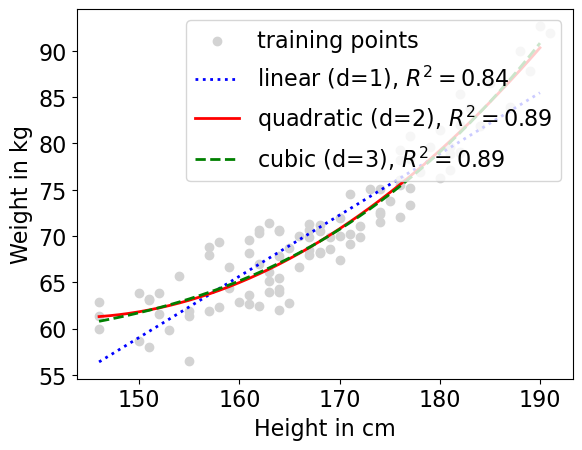

In [74]:
### linear fit, polynomial fit --> See, e.g., chapter 10 of the book by Raschka and Mirjalili (2017)
## Can we fit polynomes?

from sklearn.preprocessing import PolynomialFeatures

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.legend(loc='upper right')

#plt.savefig('images/10_11.png', dpi=300)
plt.show()


